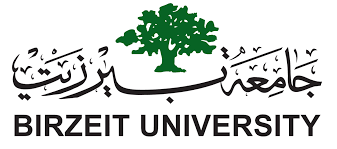

**Department of Electrical & Computer Engineering**


**First Semester, 2024/2025**

**Machine Learning and Data Science ‐ ENCS5341**

**Assignment 2 : Regression Analysis and Model Selection**


---

```
 Hidaya Mustafa - 1201910
 Razan Abdalrahman - 1200531
```






The main goal of this assignment is to build and evaluate regression models to predict car prices using features like engine capacity, horsepower, brand, and country. Predicting car prices is a key challenge in the automotive industry, helping manufacturers, dealers, and buyers understand market trends and make informed decisions.

This task requires analyzing how various features influence car prices, from performance metrics like horsepower to brand perception and regional factors. Along the way, we focus on essential steps like cleaning and preparing the data, selecting relevant features, and tuning models for accuracy. By implementing both linear (e.g., closed-form and gradient descent) and nonlinear models (e.g., polynomial regression and Radial Basis Function), the assignment demonstrates the power of machine learning in tackling real-world problems.


In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Project Overview**.

The objective of this project is to build a series of regression models using a dataset, evaluate and compare their performance, and apply various techniques to improve model accuracy and prevent overfitting. The focus will be on both linear and nonlinear regression models. We will also use feature selection methods and regularization techniques, followed by hyperparameter tuning, to select the optimal model.

# **Librarys**.

For this project, we used the following libraries to perform data preprocessing, model implementation, and evaluation.

In [114]:
# ! pip install pandas
import pandas
import pandas as pd
import numpy as np
import re
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline


# 1**. Dataset**.

### 1.1 Dataset overview.

In [115]:
df = pd.read_csv('/content/drive/MyDrive/cars.csv')
df

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,TBD,0.0,"N/A, Electric",Single,Automatic,150,fiat,ksa
1,Peugeot Traveller 2021 L3 VIP,"SAR 140,575",2.0,4,180,8 Seater,8.8,peugeot,ksa
2,Suzuki Jimny 2021 1.5L Automatic,"SAR 98,785",1.5,4,102,145,4 Seater,suzuki,ksa
3,Ford Bronco 2021 2.3T Big Bend,"SAR 198,000",2.3,4,420,4 Seater,7.5,ford,ksa
4,Honda HR-V 2021 1.8 i-VTEC LX,Orangeburst Metallic,1.8,4,140,190,5 Seater,honda,ksa
...,...,...,...,...,...,...,...,...,...
6303,Bentley Mulsanne 2021 6.75L V8 Extended Wheelbase,DISCONTINUED,6.8,8,505,296,5 Seater,bentley,uae
6304,Ferrari SF90 Stradale 2021 4.0T V8 Plug-in-Hybrid,"AED 1,766,100",4.0,8,25,800,Automatic,ferrari,uae
6305,Rolls Royce Wraith 2021 6.6L Base,"AED 1,400,000",6.6,12,624,250,4 Seater,rolls-royce,uae
6306,Lamborghini Aventador S 2021 6.5L V12 Coupe,"AED 1,650,000",6.5,NaN,740,350,2 Seater,lamborghini,uae


The provided dataset includes ***car*** details scraped from the YallaMotors website, containing approximately ***6,750 rows*** and ***9 columns***. It is designed for tasks such as Exploratory Data Analysis **(EDA)** and machine learning, particularly for predicting car prices.

***Columns:***

*   **car name:** Name and description of the car.
*   **price:** The price of the car (target variable for regression).
*   **engine_capacity:** Engine size in liters.
*   **cylinder:** Number of cylinders or fuel type (e.g., Electric).
*   **horse_power:** Horsepower details.
*   **top_speed:** Top speed or seating capacity information.
*   **seats:** Number of seats.
*   **brand:** Car manufacturer (e.g., Toyota, Hyundai).
*   **country:** Country information, mostly "ksa".



In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car name         6308 non-null   object
 1   price            6308 non-null   object
 2   engine_capacity  6308 non-null   object
 3   cylinder         5684 non-null   object
 4   horse_power      6308 non-null   object
 5   top_speed        6308 non-null   object
 6   seats            6308 non-null   object
 7   brand            6308 non-null   object
 8   country          6308 non-null   object
dtypes: object(9)
memory usage: 443.7+ KB


To make our work more structured and efficient, we divided the dataset into **categorical** and **numerical** features.

In [117]:
cat_columns = ['car name', 'price' , 'brand' , 'country']
num_columns = ['engine_capacity' , 'top_speed','horse_power' ]



---



##1.2 **Dataset Preprocessing Steps.**

To prepare the dataset for building regression models, we performed the following preprocessing steps.

### 1.2.1 Handling missing values.

Handling missing values is an essential step in data preprocessing to ensure data quality. We identify and address missing or inconsistent values (e.g., "TBD" or "N/A") by replacing them with NaN for consistency. Depending on the situation, we either drop rows/columns with substantial missing data or fill the gaps using strategies like imputation (mean, median, or mode) to maintain the dataset's integrity.



---




The seats column contains missing or inconsistent values, including entries found in the top_speed column that contain seating information (e.g., "8 Seater"). To clean this data, seating information was extracted from the top_speed column where applicable. The "Seater" text was removed, and the cleaned values were converted into integers. Any remaining missing or invalid values were handled by coercing them into NaN, ensuring the seats column contains only valid numerical data.

In [118]:
# Clean the seats column.

# 1. Replace missing or inconsistent values in 'seats' with values from 'top_speed' if they contain seating info.
df['seats'] = df['top_speed'].where(df['top_speed'].str.contains('Seater', na=False), df['seats'])

# 2. Remove the text "Seater" and strip any extra spaces.
df['seats'] = df['seats'].str.replace('Seater', '', regex=False).str.strip()

# 3. Convert the cleaned 'seats' column to numeric, coercing errors to NaN.
df['seats'] = pd.to_numeric(df['seats'], errors='coerce')

# 4. Round values and convert to integer, allowing NaNs for invalid data.
df['seats'] = df['seats'].round().astype('Int64')

print(df['seats'])

0        150
1          8
2          4
3          4
4          5
        ... 
6303       5
6304    <NA>
6305       4
6306       2
6307       5
Name: seats, Length: 6308, dtype: Int64


The seats column now contains clean numerical values representing the number of seats in each car.



---



The cylinder column contains missing or inconsistent values, such as "N/A, Electric" for electric vehicles. To clean this column, the value "N/A, Electric" was replaced with 0, representing the absence of cylinders in electric vehicles. The column was then converted to numeric, coercing invalid entries into NaN. Finally, the data was cast as integers to ensure consistency and proper handling of valid numerical values.

In [119]:
# Clean the cylinder column .
# 1. Replace "N/A, Electric" with 0 to represent electric vehicles.
df['cylinder'] = df['cylinder'].replace('N/A, Electric', 0)

# 2. Convert the column to numeric, coercing errors into NaN for invalid data.
df['cylinder'] = pd.to_numeric(df['cylinder'], errors='coerce')

# 3. Cast the cleaned values as integers, allowing NaN for invalid data.
df['cylinder'] = df['cylinder'].astype('Int64')

print(df['cylinder'])

0          0
1          4
2          4
3          4
4          4
        ... 
6303       8
6304       8
6305      12
6306    <NA>
6307       8
Name: cylinder, Length: 6308, dtype: Int64


The cylinder column now represents valid numerical values, with 0 for Electrical vehicles and appropriate cylinder counts for others.



---



The horse_power column contains non-numeric entries, such as "Single" and "Double," which represent undefined values. To clean this column, the non-numeric entries were replaced with the brand-specific average horsepower. The column was then converted to numeric values, ensuring consistency and usability for further analysis.

In [120]:
# 1. Convert 'horse_power' to numeric where possible, ignoring errors for non-numeric values.
df['horse_power_numeric'] = pd.to_numeric(df['horse_power'], errors='coerce')

# 2. Group by 'brand' and calculate the mean of the numeric 'horse_power'.
brand_avg_horse_power = df.groupby('brand')['horse_power_numeric'].mean()

# 3. Replace 'Single' and 'Double' in 'horse_power' with the respective brand's average.
def replace_with_avg(row, avg_dict):
    if row['horse_power'] in ['Single', 'Double']:
        return avg_dict.get(row['brand'], row['horse_power'])
    return row['horse_power']

# 4. Apply the replacement.
df['horse_power'] = df.apply(replace_with_avg, avg_dict=brand_avg_horse_power, axis=1)

df = df.drop(columns=['horse_power_numeric'])

# 5. Display the updated data.
print(df['horse_power'])

0       110.090909
1              180
2              102
3              420
4              140
           ...    
6303           505
6304            25
6305           624
6306           740
6307           530
Name: horse_power, Length: 6308, dtype: object


The horse_power column now contains clean numerical values.



---



Some numerical columns, such as engine_capacity and top_speed, contained missing or invalid values. These were cleaned by coercing invalid entries into NaN. This ensured that all columns were numeric and consistent for analysis.

In [121]:
# 1. Clean all the missing cell in the other numerical columns.
def clean_numeric_column(column):
    return pd.to_numeric(column, errors='coerce')
# 2. Apply the cleaning function to all numerical columns.
for col in num_columns:
    df[col] = clean_numeric_column(df[col])

print(df[num_columns])

      engine_capacity  top_speed  horse_power
0                 0.0        NaN   110.090909
1                 2.0        NaN   180.000000
2                 1.5      145.0   102.000000
3                 2.3        NaN   420.000000
4                 1.8      190.0   140.000000
...               ...        ...          ...
6303              6.8      296.0   505.000000
6304              4.0      800.0    25.000000
6305              6.6      250.0   624.000000
6306              6.5      350.0   740.000000
6307              6.8      305.0   530.000000

[6308 rows x 3 columns]




---



The price column contained missing values and inconsistent formatting, with prices represented in multiple currencies. To clean this column, numeric values were extracted, and missing prices were filled with the mean price for the corresponding country. Finally, all prices were converted to USD using predefined exchange rates.

In [122]:
# 1. Extract the numeric price value from the 'price' column.
def extract_price(x):
    if isinstance(x, str) and len(x.split()) > 1:
        try:
            price_str = x.split()[1].replace(',', '')
            return float(price_str)
        except ValueError:

            return np.nan
    return np.nan

df['currency'] = df['price'].apply(lambda x: x.split()[0] if isinstance(x, str) else np.nan)
df['price'] = df['price'].apply(extract_price)

# 2. Fill missing prices with the mean price for the respective country.
mean_prices = df.groupby('country')['price'].transform('mean')

df['price'].fillna(mean_prices, inplace=True)

df = df.drop(columns=['currency'])

print(df['price'])

0       3.146631e+05
1       1.405750e+05
2       9.878500e+04
3       1.980000e+05
4       3.146631e+05
            ...     
6303    2.651786e+05
6304    1.766100e+06
6305    1.400000e+06
6306    1.650000e+06
6307    2.651786e+05
Name: price, Length: 6308, dtype: float64


<ipython-input-122-a12a8cce61cb>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(mean_prices, inplace=True)


In [123]:

# 3. Convert all prices to USD using predefined exchange rates.
exchange_rates = {
    'uae': 0.27,
    'kuwait': 3.25,
    'usa': 1.0,
    'ksa': 0.27,
    'egypt': 0.02,
    'bahrain': 2.65,
    'oman': 2.6,
    'qatar': 0.27
}

# 4. Define a function to convert prices to USD.
def convert_to_usd(row):
    country = row['country']
    price = row['price']

    exchange_rate = exchange_rates.get(country.lower(), 1.0)
    return price * exchange_rate

df['price'] = df.apply(convert_to_usd, axis=1)
print(df['price'])

0        84959.034441
1        37955.250000
2        26671.950000
3        53460.000000
4        84959.034441
            ...      
6303     71598.235442
6304    476847.000000
6305    378000.000000
6306    445500.000000
6307     71598.235442
Name: price, Length: 6308, dtype: float64




---



In [124]:
# Print the missing values in the dataset.
print("Mising Values Summary:")
print("-----------------------------")
print(df.isnull().sum())

Mising Values Summary:
-----------------------------
car name             0
price                0
engine_capacity      3
cylinder           627
horse_power          5
top_speed          433
seats              116
brand                0
country              0
dtype: int64




---



The median was used to impute missing values in columns like engine_capacity, cylinder, top_speed, seats, and horse_power because it is robust to outliers and accurately represents the central tendency of the data. Unlike the mean, the median minimizes the impact of extreme values and works well for skewed distributions, ensuring the imputed values align with the typical range of each feature. This approach preserves the dataset's overall integrity and stability for further analysis and modeling.

In [125]:
columns_to_impute = ['engine_capacity' , 'cylinder', 'top_speed', 'seats','horse_power']

for column in columns_to_impute:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

<ipython-input-125-1dfda38b4d54>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)
<ipython-input-125-1dfda38b4d54>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [126]:
df

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country
0,Fiat 500e 2021 La Prima,84959.034441,0.0,0,110.090909,211.0,150,fiat,ksa
1,Peugeot Traveller 2021 L3 VIP,37955.250000,2.0,4,180.000000,211.0,8,peugeot,ksa
2,Suzuki Jimny 2021 1.5L Automatic,26671.950000,1.5,4,102.000000,145.0,4,suzuki,ksa
3,Ford Bronco 2021 2.3T Big Bend,53460.000000,2.3,4,420.000000,211.0,4,ford,ksa
4,Honda HR-V 2021 1.8 i-VTEC LX,84959.034441,1.8,4,140.000000,190.0,5,honda,ksa
...,...,...,...,...,...,...,...,...,...
6303,Bentley Mulsanne 2021 6.75L V8 Extended Wheelbase,71598.235442,6.8,8,505.000000,296.0,5,bentley,uae
6304,Ferrari SF90 Stradale 2021 4.0T V8 Plug-in-Hybrid,476847.000000,4.0,8,25.000000,800.0,5,ferrari,uae
6305,Rolls Royce Wraith 2021 6.6L Base,378000.000000,6.6,12,624.000000,250.0,4,rolls-royce,uae
6306,Lamborghini Aventador S 2021 6.5L V12 Coupe,445500.000000,6.5,4,740.000000,350.0,2,lamborghini,uae


The dataset after completing the cleaning process.



---



**Outliers**

Outliers in the dataset were handled to ensure they did not distort the analysis or model predictions. Initial boxplots identified outliers in numerical columns like price, engine_capacity, and horse_power. Unrealistic values in the seats column (e.g., above 20) were replaced with random integers between 10 and 20 to maintain realistic variability. For other numerical columns, the Interquartile Range (IQR) method was used to clip outliers to the nearest valid boundary. Post-clipping boxplots confirmed that the outliers were effectively handled, ensuring the dataset was clean and ready for modeling.

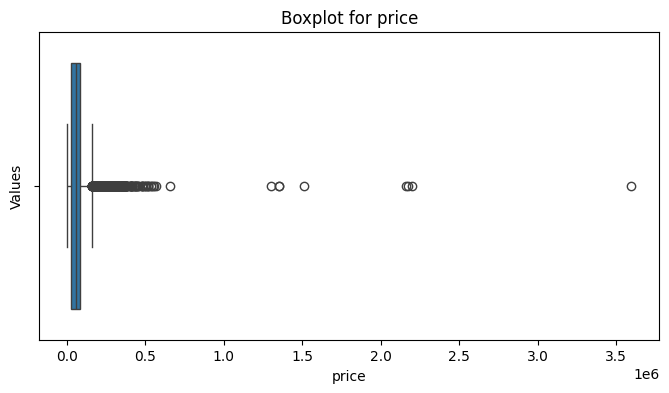

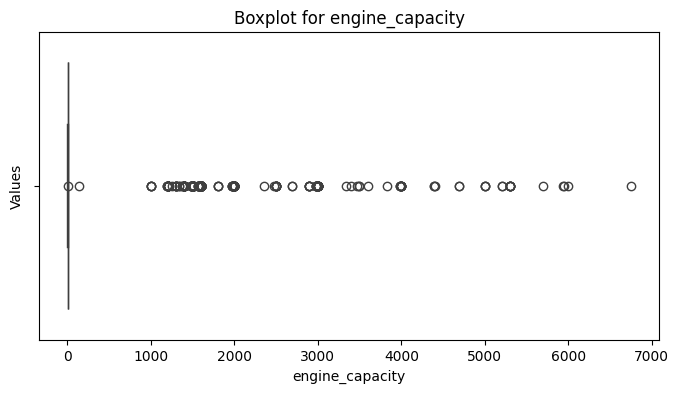

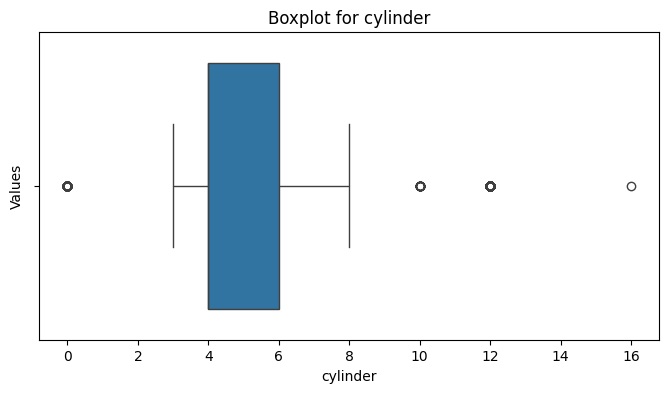

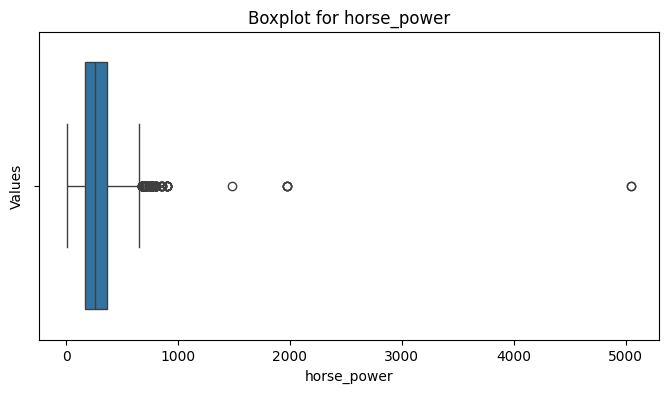

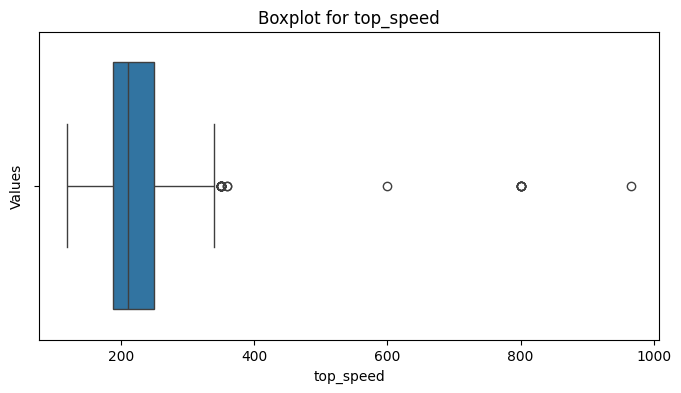

In [127]:
# List of numerical columns for outlier detection and handling.
numeric_columns = ['price', 'engine_capacity',	'cylinder'	,'horse_power',	'top_speed']

# Initial Boxplots to visualize outliers.
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.show()

Boxplots of numerical features before handling outliers.

In [128]:
# Replace unrealistic values in the 'seats' column.
np.random.seed(42)

# Replace values above 20 in the 'seats' column with random integers between 10 and 20.
df.loc[df['seats'] > 20, 'seats'] = np.random.randint(10, 21, size=(df[df['seats'] > 20].shape[0])).astype('int64')

In [129]:
# Calculate IQR and clip outliers for each numerical column.
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

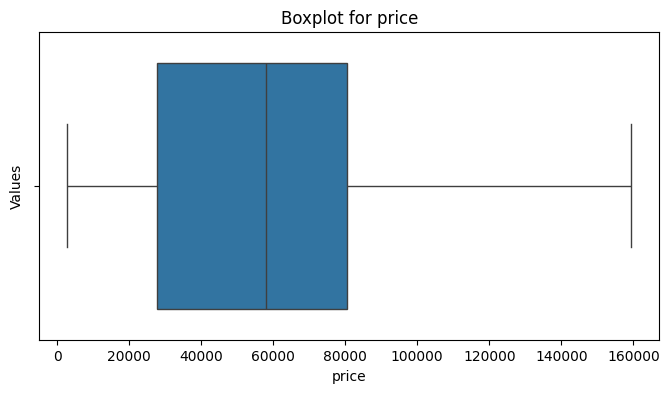

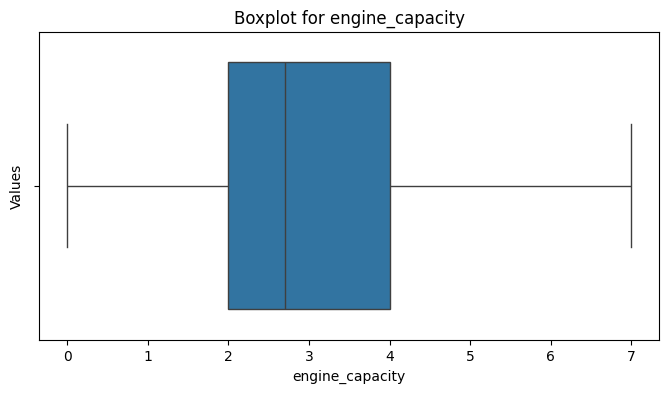

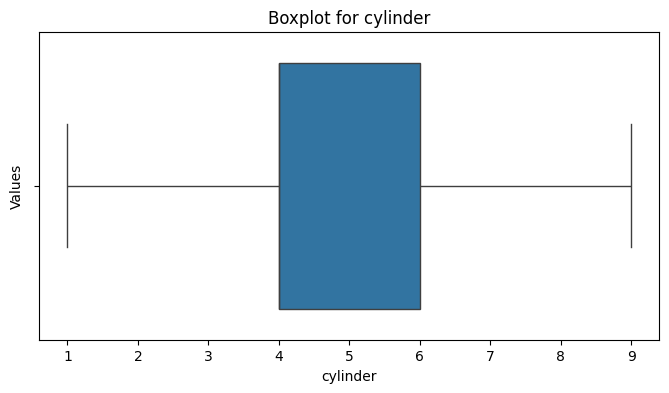

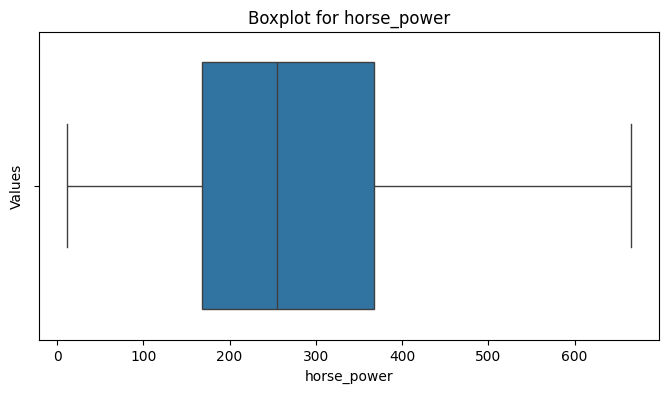

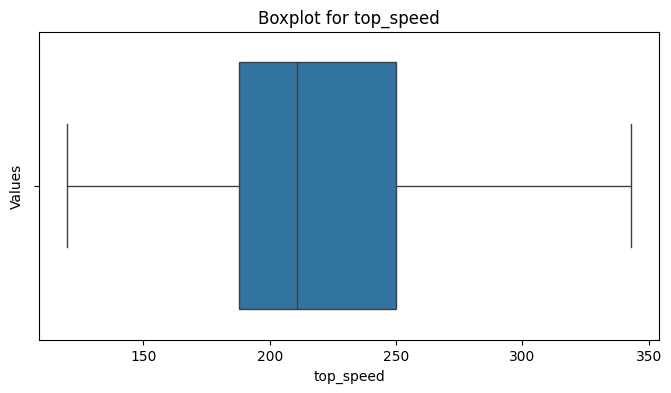

In [130]:
 # Post-Clipping Boxplots to verify outlier handling.
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.show()

Boxplots of numerical features before handling outliers.



---



### 1.2.2 Encoding categorical features.

Categorical features in the dataset, such as country and brand, were encoded to make them suitable for numerical analysis by machine learning models. This step ensured that the categorical data was represented in a format that the models could process while retaining the relationships between categories.

The country column, which specifies the country where the car is sold, was encoded using one-hot encoding. This method creates binary columns (0 or 1) for each unique category, ensuring no ordinal relationships are implied between the countries.

In [131]:
# One-Hot Encoding for the 'country' column.
df= pd.get_dummies(df, columns=['country'], prefix='country')

print(df.head())

                           car name         price  engine_capacity  cylinder  \
0           Fiat 500e 2021 La Prima  84959.034441              0.0         1   
1     Peugeot Traveller 2021 L3 VIP  37955.250000              2.0         4   
2  Suzuki Jimny 2021 1.5L Automatic  26671.950000              1.5         4   
3    Ford Bronco 2021 2.3T Big Bend  53460.000000              2.3         4   
4     Honda HR-V 2021 1.8 i-VTEC LX  84959.034441              1.8         4   

   horse_power  top_speed  seats    brand  country_bahrain  country_egypt  \
0   110.090909      211.0     16     fiat            False          False   
1   180.000000      211.0      8  peugeot            False          False   
2   102.000000      145.0      4   suzuki            False          False   
3   420.000000      211.0      4     ford            False          False   
4   140.000000      190.0      5    honda            False          False   

   country_ksa  country_kuwait  country_oman  country_qa

The brand column, which specifies the car manufacturer, was encoded using label encoding. This method assigns a unique integer to each brand, compactly representing the categorical values.

In [132]:
# Encode the brand in labels.
label_encoder = LabelEncoder()

df['brand'] = label_encoder.fit_transform(df['brand'])

df

,car name,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand,country_bahrain,country_egypt,country_ksa,country_kuwait,country_oman,country_qatar,country_uae
0,Fiat 500e 2021 La Prima,84959.034441,0.0,1,110.090909,211.0,16,25,False,False,True,False,False,False,False
1,Peugeot Traveller 2021 L3 VIP,37955.250000,2.0,4,180.000000,211.0,8,62,False,False,True,False,False,False,False
2,Suzuki Jimny 2021 1.5L Automatic,26671.950000,1.5,4,102.000000,145.0,4,74,False,False,True,False,False,False,False
3,Ford Bronco 2021 2.3T Big Bend,53460.000000,2.3,4,420.000000,211.0,4,26,False,False,True,False,False,False,False
4,Honda HR-V 2021 1.8 i-VTEC LX,84959.034441,1.8,4,140.000000,190.0,5,33,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,Bentley Mulsanne 2021 6.75L V8 Extended Wheelbase,71598.235442,6.8,8,505.000000,296.0,5,7,False,False,False,False,False,False,True
6304,Ferrari SF90 Stradale 2021 4.0T V8 Plug-in-Hybrid,159383.233526,4.0,8,25.000000,343.0,5,24,False,False,False,False,False,False,True
6305,Rolls Royce Wraith 2021 6.6L Base,159383.233526,6.6,9,624.000000,250.0,4,67,False,False,False,False,False,False,True
6306,Lamborghini Aventador S 2021 6.5L V12 Coupe,159383.233526,6.5,4,665.500000,343.0,2,45,False,False,False,False,False,False,True




---



In [133]:
df.describe()

,price,engine_capacity,cylinder,horse_power,top_speed,seats,brand
count,6308.000000,6308.000000,6308.0,6308.000000,6308.000000,6308.0,6308.000000
mean,63017.626170,3.121259,5.110178,288.032521,220.255073,5.167724,41.851617
std,41331.121478,1.657117,1.689296,146.500093,41.037857,1.928258,22.469249
min,2880.000000,0.000000,1.0,12.000000,120.000000,2.0,0.000000
25%,27824.337500,2.000000,4.0,168.000000,188.000000,5.0,25.000000
50%,58050.000000,2.700000,4.0,255.000000,211.000000,5.0,46.000000
75%,80447.895910,4.000000,6.0,367.000000,250.000000,5.0,60.000000
max,159383.233526,7.000000,9.0,665.500000,343.000000,20.0,81.000000


### 1.2.3 Normalizing.

To ensure consistent scaling across features, numerical columns were normalized using z-score normalization via the StandardScaler. This step standardized the columns to have a mean of 0 and a standard deviation of 1, which helps prevent features with larger ranges (e.g., price) from dominating those with smaller ranges (e.g., engine_capacity) during model training.

In [134]:
# 1. List of columns to normalize.
columns_to_normalize = ['engine_capacity', 'cylinder', 'top_speed','horse_power','seats','brand', 'price']

scaler = StandardScaler()
# 2. Apply z-score normalization to the specified columns.
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df[columns_to_normalize].head())

   engine_capacity  cylinder  top_speed  horse_power     seats     brand  \
0        -1.883697 -2.433264  -0.225543    -1.214714  5.618095 -0.750045   
1        -0.676686 -0.657235  -0.225543    -0.737481  1.468943  0.896780   
2        -0.978438 -0.657235  -1.833942    -1.269946 -0.605633  1.430886   
3        -0.495634 -0.657235  -0.225543     0.900873 -0.605633 -0.705536   
4        -0.797387 -0.657235  -0.737306    -1.010540 -0.086989 -0.393975   

      price  
0  0.530911  
1 -0.606428  
2 -0.879448  
3 -0.231264  
4  0.530911  


In [135]:
df=df.astype({'country_bahrain': 'int', 'country_egypt': 'int',
                          'country_ksa': 'int', 'country_kuwait': 'int',
                          'country_oman': 'int', 'country_qatar': 'int',
                          'country_uae': 'int'})
df['seats'] = df['seats'].astype('int64')



---



### 1.2.4 Spliting Data.

To build and evaluate regression models effectively, the dataset was split into three subsets: training, validation, and test sets. This ensures that:

*   Training Set is used to fit the model.
*   Validation Set is used to tune hyperparameters and select the best model.
*   Test Set is used for final evaluation to assess the model's generalization performance.

In [136]:
# Define features (X) and target (y).
X = df.drop(columns=['price','car name'])
y = df['price']

# Split data into training (60%) and temporary (40%) sets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the temporary set into validation (20%) and test (20%) sets.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert subsets to NumPy arrays for compatibility with custom models.
X_train_np = X_train.values
X_val_np = X_val.values
y_train_np = y_train.values
y_val_np = y_val.values

# Print out the sizes of the resulting sets.
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Validation data size: {X_val.shape[0]} samples")
print(f"Test data size: {X_test.shape[0]} samples")

Training data size: 3784 samples
Validation data size: 1262 samples
Test data size: 1262 samples




---



# 2**. Building Regression Models**.




## 2.1 Linear Models.

###2.1.1 Built-in Linear Regression.

We used sklearn's LinearRegression to implement a baseline linear regression model. This built-in model computes the coefficients that minimize the residual sum of squares between the observed and predicted values of the target variable (price).

In [137]:
# Initialize the Linear Regression model.
linear_model = LinearRegression()

# Fit the model on the training data.
linear_model.fit(X_train_np, y_train)

LinearRegression()



---



###2.1.2 Build Linear Regression.

#### 2.1.2.1 The closed-form solution.

The closed-form solution calculates the weights (coefficients) of a linear regression model by solving a mathematical equation. It avoids iterative methods and directly computes the weights that minimize the error between predictions and actual values.

In [138]:
def closed_form_solution(X, y, lambda_reg=1e-5):
    # 1. Add bias term (intercept) to X.
    X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]

    # 2. Compute X^T * X.
    X_T_X = X_with_bias.T @ X_with_bias

    # 3. Create an identity matrix for regularization.
    identity_matrix = np.eye(X_T_X.shape[0])
    identity_matrix[0, 0] = 0
    X_T_X_reg = X_T_X + lambda_reg * identity_matrix
    X_T_X_reg_inv = np.linalg.inv(X_T_X_reg)
    X_T_y = X_with_bias.T @ y
    w = X_T_X_reg_inv @ X_T_y
    return w

#### 2.1.2.2 The gradient descent method.

This method optimizes the weights of a linear regression model iteratively. A bias term is added to the dataset to account for the intercept in the equation. The algorithm starts with all weights initialized to zero and updates them by calculating the gradient of the error at each step. The process continues for a specified number of iterations, ensuring gradual improvement of the model's accuracy.



In [139]:
def gradient_descent(X, y, alpha=0.001, iterations=1000):
    # 1. Add a column of ones to X to account for the bias term
    X = np.c_[np.ones((X.shape[0], 1)), X]
    m, n = X.shape
    w = np.zeros(n)

    # 2. Perform gradient descent for a specified number of iterations.
    for _ in range(iterations):
        gradient = (1 / m) * (X.T @ (X @ w - y))
        w -= alpha * gradient
    return w

In [95]:
# 3. Add bias to the validation set for consistency.
X_val_with_bias = np.c_[np.ones((X_val_np.shape[0], 1)), X_val_np]

# 4. Compute wights using both methods.
w_closed_form = closed_form_solution(X_train_np, y_train_np)
w_gradient_descent = gradient_descent(X_train_np, y_train_np, alpha=0.001, iterations=1000)



---



###2.1.3 LASSO (L1 Regularization)

LASSO regression adds an L1 regularization term to the cost function, encouraging sparsity by reducing less important feature coefficients to zero.

In [141]:
# 1. These represent different strengths of L1 regularization.
lambda_values = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# 2. Instantiate a LASSO regression model.
lasso = Lasso(max_iter=200000)

# 3. Perform grid search with cross-validation to find the best regularization parameter.
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=lambda_values, scoring='neg_mean_squared_error', cv=5)
grid_search_lasso.fit(X_train, y_train)

best_lasso_model = grid_search_lasso.best_estimator_
best_lambda = grid_search_lasso.best_params_['alpha']



---



###2.1.4 Ridge Regression (L2 Regularization).

Ridge Regression adds L2 regularization to the cost function, penalizing the squared magnitude of feature coefficients to reduce overfitting. This regularization method ensures that all coefficients are small but not necessarily zero, preserving all features while controlling their influence.



In [97]:
lambda_values = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

ridge = Ridge(max_iter=10000)

grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=lambda_values, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_train, y_train)

best_ridge_model = grid_search_ridge.best_estimator_
best_lambda = grid_search_ridge.best_params_['alpha']



---



## 2.2 Non-linear Models.

Polynomial regression extends linear regression by adding polynomial features to the model, allowing it to capture non-linear relationships in the data. Here, degrees from 2 to 6 are explored to find the best-fitting model.

In [142]:
# 1. Initialize the LinearRegression model.
linear_regressor = LinearRegression()

# 2. Define the range of polynomial degrees to test.
degrees = range(2, 7)

# 3. Iterate through each polynomial degree.
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.transform(X_val)

    linear_regressor.fit(X_poly_train, y_train)

    y_val_pred = linear_regressor.predict(X_poly_val)

    # Output the performance metrics for the current degree.
    print(f"Polynomial Degree: {degree}")
    print(f"Mean Squared Error: {mean_squared_error(y_val, y_val_pred)}")
    print(f"R-squared: {r2_score(y_val, y_val_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_val, y_val_pred)}")
    print()

Polynomial Degree: 2
Mean Squared Error: 0.2577706755869455
R-squared: 0.7420178216118459
Mean Absolute Error: 0.385023716105236

Polynomial Degree: 3
Mean Squared Error: 0.24926322777255877
R-squared: 0.7505322498519145
Mean Absolute Error: 0.3763156438438528

Polynomial Degree: 4
Mean Squared Error: 1.9207762561811696e+16
R-squared: -1.9223522677183716e+16
Mean Absolute Error: 4935546.98486608

Polynomial Degree: 5
Mean Squared Error: 1230726.7558803314
R-squared: -1231735.5765505775
Mean Absolute Error: 97.06079921989217

Polynomial Degree: 6
Mean Squared Error: 152884954.74404752
R-squared: -153010397.01302058
Mean Absolute Error: 1523.1486131457368





---



# 3. **Model Selection Using Validation Set**.

Model evaluation involves assessing the performance of different regression models on the validation set to determine the best model for predicting the target variable.

In [147]:
# 1. Predict the validation set using the built-in linear regression model.
y_val_pred = linear_model.predict(X_val_np)

# 2. Calculate evaluation metrics.
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.2997988134149693
Mean Absolute Error: 0.4186406825794693
R-squared: 0.6999551993768586


In [148]:
# 1. Predict the validation set using weights from the closed-form solution and gradient descent.
y_pred_closed_form = X_val_with_bias @ w_closed_form
y_pred_gradient_descent = X_val_with_bias @ w_gradient_descent

# 2. Evaluate metrics for BOTH the closed-form solution and the gradient descent solution.
mse_closed_form = mean_squared_error(y_val_np, y_pred_closed_form)
mse_gradient_descent = mean_squared_error(y_val_np, y_pred_gradient_descent)

r2_score_closed_form = r2_score(y_val_np, y_pred_closed_form)
r2_score_gradient_descent = r2_score(y_val_np, y_pred_gradient_descent)

mae1 = mean_absolute_error(y_val_np, y_pred_closed_form)
mea2 = mean_absolute_error(y_val_np, y_pred_gradient_descent)

print("Closed-form solution")
print("MSE:", mse_closed_form)
print("R2 Score:", r2_score_closed_form)
print("MAE:", mae1)
print("\n")
print("Gradient Descent")
print("MSE:", mse_gradient_descent)
print("R2 Score:", r2_score_gradient_descent)
print("MAE:", mea2)

Closed-form solution
MSE: 0.299798813522232
R2 Score: 0.6999551992695079
MAE: 0.4186406825106156


Gradient Descent
MSE: 0.3608640301625723
R2 Score: 0.6388398781541476
MAE: 0.47843897250474915


In [149]:
# 1. Predict the validation set using the best LASSO model from grid search.
y_val_pred = best_lasso_model.predict(X_val)

# 2. Calculate LASSO evaluation metrics.
lasso_val_error = mean_squared_error(y_val, y_val_pred)
mae_ = mean_absolute_error(y_val, y_val_pred)
r2_ = r2_score(y_val, y_val_pred)


print(f"Best LASSO λ: {best_lambda}")
print(f"LASSO Regression:")
print(f"MSE: {lasso_val_error}")
print(f"MAE: {mae_}")
print(f"R2 Score: {r2_}")

Best LASSO λ: 0.01
LASSO Regression:
MSE: 0.30391539914718463
MAE: 0.42016474883845273
R2 Score: 0.6958352359547186


In [150]:
y_val_pred = best_ridge_model.predict(X_val)

ridge_val_error = mean_squared_error(y_val, y_val_pred)
mae_ = mean_absolute_error(y_val, y_val_pred)
r2_ = r2_score(y_val, y_val_pred)

print(f"Best Ridge λ: {best_lambda}")
print(f"Ridge Regression:")
print(f"MSE: {ridge_val_error}")
print(f"MAE: {mae_}")
print(f"R2 Score: {r2_}")

Best Ridge λ: 0.01
Ridge Regression:
MSE: 0.29981253163420724
MAE: 0.4186272676197416
R2 Score: 0.6999414699017172




---



# 4. **Feature Selection with Forward Selection**.

Forward Feature Selection is a stepwise feature selection technique aimed at iteratively building a model by selecting features that minimize error and improve performance.

Selected Features: ['horse_power', 'country_egypt', 'top_speed', 'country_kuwait', 'cylinder', 'seats', 'country_ksa', 'brand', 'engine_capacity', 'country_qatar', 'country_uae', 'country_bahrain', 'country_oman']
MSE History: [0.3498165713282278, 0.3231183036399981, 0.3079850564236844, 0.3051268669273905, 0.3036154324400962, 0.30142431661489655, 0.3000256689017248, 0.29965798899404233, 0.2995396507897997, 0.29950398728612254, 0.29951398432487764, 0.2997988134149692, 0.2997988134149693]
MAE History: [0.4629347184387034, 0.4455589618951471, 0.42570910798674094, 0.4238151134848002, 0.4223950852249581, 0.4197605994021281, 0.41842982754682145, 0.41841657596134013, 0.4181500867167219, 0.4182105171469863, 0.418201635987374, 0.4186406825794691, 0.4186406825794693]
R² History: [0.6498964015125477, 0.6766165753326158, 0.6917622394934494, 0.6946227741559787, 0.6961354487867732, 0.6983283624391841, 0.6997281577534495, 0.7000961393452947, 0.7002145746469346, 0.700250267412788, 0.7002402621713865, 

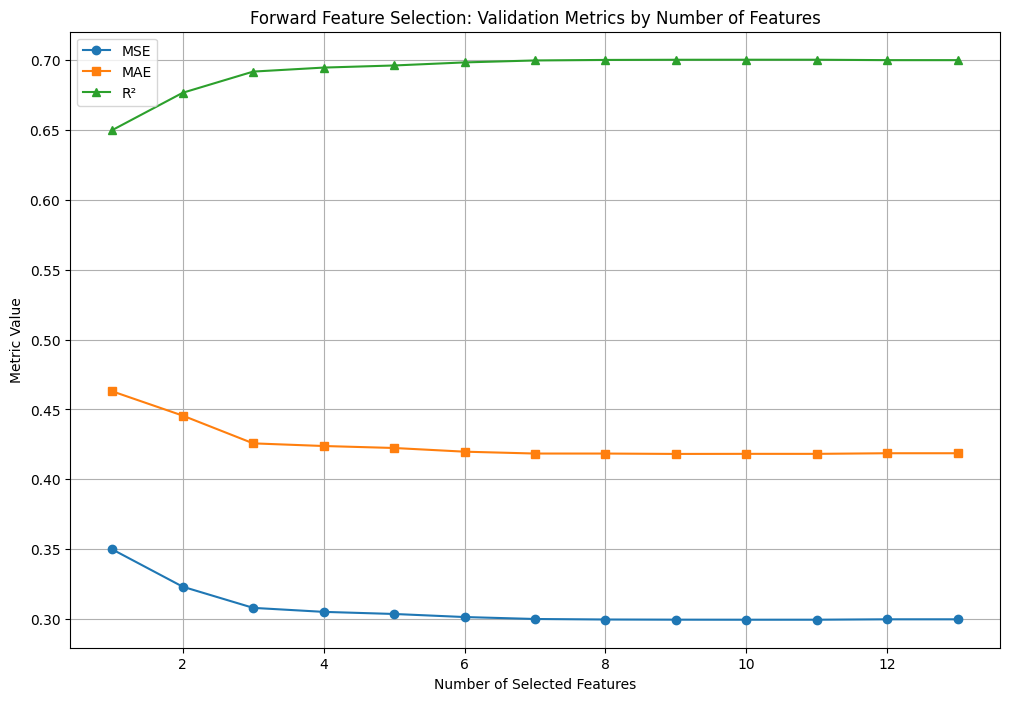

In [151]:
def forward_feature_selection(X_train, y_train, X_val, y_val, max_features=None):
    selected_features = []
    remaining_features = list(X_train.columns)
    mse_history, mae_history, r2_history = [], [], []

    while remaining_features and (max_features is None or len(selected_features) < max_features):
        best_feature = None
        best_mse = float('inf')
        best_mae, best_r2 = None, None

        for feature in remaining_features:

            current_features = selected_features + [feature]
            model = LinearRegression()
            model.fit(X_train[current_features], y_train)
            y_val_pred = model.predict(X_val[current_features])


            mse = mean_squared_error(y_val, y_val_pred)
            mae = mean_absolute_error(y_val, y_val_pred)
            r2 = r2_score(y_val, y_val_pred)


            if mse < best_mse:
                best_feature = feature
                best_mse = mse
                best_mae = mae
                best_r2 = r2

        if best_feature is not None:

            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            mse_history.append(best_mse)
            mae_history.append(best_mae)
            r2_history.append(best_r2)
        else:
            break

    return selected_features, mse_history, mae_history, r2_history

# 1. Perform forward feature selection.
selected_features, mse_history, mae_history, r2_history = forward_feature_selection(X_train, y_train, X_val, y_val)

# 2. Output the selected features and metric histories.
print("Selected Features:", selected_features)
print("MSE History:", mse_history)
print("MAE History:", mae_history)
print("R² History:", r2_history)

# 3. Visualization of metrics over the number of selected features.
plt.figure(figsize=(12, 8))

# MSE
plt.plot(range(1, len(mse_history) + 1), mse_history, label="MSE", marker='o')

# MAE
plt.plot(range(1, len(mae_history) + 1), mae_history, label="MAE", marker='s')

# R²
plt.plot(range(1, len(r2_history) + 1), r2_history, label="R²", marker='^')

plt.xlabel("Number of Selected Features")
plt.ylabel("Metric Value")
plt.title("Forward Feature Selection: Validation Metrics by Number of Features")
plt.legend()
plt.grid()
plt.show()


The results include:


1.   A list of selected features in the order of their inclusion.
2.   The historical progression of MSE, MAE, and R² metrics as features are added.



---



# 5. **Hyperparameter Tuning with Grid Search**.

hyperparameter tuning using grid search for optimal regularization parameters (alpha) in Lasso and Ridge regression models. Additionally, hyperparameter tuning is extended to polynomial regression with Lasso regularization.

In [152]:
def grid_search_tuning(X_train, y_train, X_val, y_val, model_type='lasso', param_grid=None):

    if model_type == 'lasso':
        model = Lasso(max_iter=10000)
    elif model_type == 'ridge':
        model = Ridge(max_iter=10000)
    else:
        raise ValueError("Model type must be 'lasso' or 'ridge'")

    if param_grid is None:
        param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

    grid_search = GridSearchCV( model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Best model.
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate on validation set.
    y_val_pred = best_model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    print("Best Parameters:", best_params)
    print("Validation MSE:", val_mse)
    print("Validation MAE:", val_mae)
    print("Validation R²:", val_r2)
    print("\n")

    return best_model, best_params, grid_search.cv_results_

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
best_lasso_model, best_lasso_params, lasso_results = grid_search_tuning(
    X_train, y_train, X_val, y_val, model_type='lasso', param_grid=param_grid
)

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
best_ridge_model, best_ridge_params, ridge_results = grid_search_tuning(
    X_train, y_train, X_val, y_val, model_type='ridge', param_grid=param_grid
)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'alpha': 0.01}
Validation MSE: 0.30391539914718463
Validation MAE: 0.42016474883845273
Validation R²: 0.6958352359547186


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'alpha': 1}
Validation MSE: 0.29981253163420724
Validation MAE: 0.4186272676197416
Validation R²: 0.6999414699017172




These results include: The best alpha value for Lasso and Ridge.

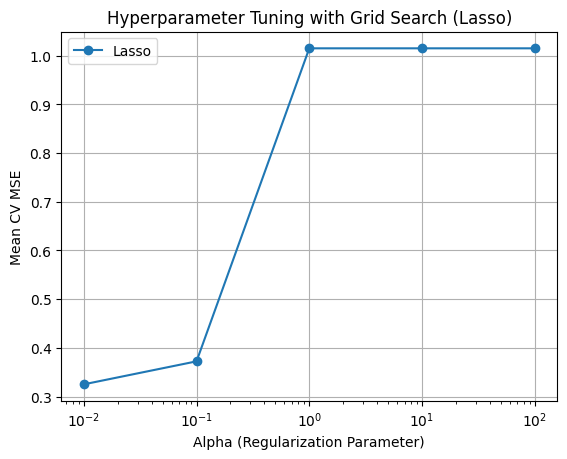

In [153]:
# Visualizing the grid search results for Lasso.
alphas = [0.01, 0.1, 1, 10, 100]
mean_scores = -lasso_results['mean_test_score']

plt.plot(alphas, mean_scores, marker='o', label="Lasso")
plt.xscale('log')
plt.xlabel("Alpha (Regularization Parameter)")
plt.ylabel("Mean CV MSE")
plt.title("Hyperparameter Tuning with Grid Search (Lasso)")
plt.legend()
plt.grid()
plt.show()

These results include: The optimal polynomial degree for polynomial regression with Lasso.

In [154]:
# Scale data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define a reduced parameter grid.
param_grid = {'alpha': [0.1, 1, 10]}

# Limit polynomial degrees to a smaller range.
best_models = []
for degree in range(2, 5):
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('lasso', Lasso(max_iter=10000))
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid={'lasso__alpha': param_grid['alpha']},
        scoring='neg_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    best_score = -grid_search.best_score_
    best_models.append((degree, best_model, best_score))

# Find the best polynomial degree.
best_degree, best_model, best_score = min(best_models, key=lambda x: x[2])

print(f"Best polynomial degree: {best_degree}")
print(f"Validation MSE: {best_score}")


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best polynomial degree: 4
Validation MSE: 0.30355071936752337


These results include: MSE, MAE, and R² metrics to evaluate validation performance.

# 6. **Model Evaluation on Test Set**.

In this section, we evaluate the best-performing model from the validation stage on the test dataset. The goal is to assess the model's generalization performance on unseen data. Key metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R^2) are computed to provide a final evaluation of the model's performance. This ensures that the model's predictive capability is robust and not overfitted to the training or validation data.

In [112]:
# 1. Evaluate the best model on the test set.
y_test_pred = best_ridge_model.predict(X_test)  # Replace `best_ridge_model` with the best model you selected

# 2. Compute evaluation metrics on the test set.
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 3. Print evaluation results.
print("Test Set Performance:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"R-squared (R²): {test_r2}")

Test Set Performance:
Mean Squared Error (MSE): 0.33120542320726853
Mean Absolute Error (MAE): 0.44037320749469966
R-squared (R²): 0.6534440299861966


***THANK YOU!***